## Python Notebook Looking at Phase Info

So this looks like a cool way to kind of test the formatting and how notebooks work, and practice for writing up what I have done. Also it should be a more organized way of sharing the info and showing what tests were done step-by-step. 
   
Imports are the usual, wavelet_transforms just combines all the wavelet transforms and there inverses that I now have in python. The 'nonguassianextraction' fan transform returns the separated gaussian and non-gaussian parts of the wavelets.

In [79]:
%matplotlib inline
import numpy as np
import wavelet_transforms as wts
from nonguassianextraction import fan_transform
from astropy.io import fits
import matplotlib.pyplot as plt
print 'done import'

done import


## The Original Image

A slice of the same HIGAL survey image as was in J-F's paper was used. It was padded with 45 pixels of 0 on each side. The built in hamming python function allowed for the edges to be tapered down to zero. Places in the image greater than 300 were just set to equal 300 to account for the point sources for now. Without this 'removal' of point sources the plots look similar but are more spread out. So it will probably be important to entirely remove them with a Gaussian subtraction or some other method.

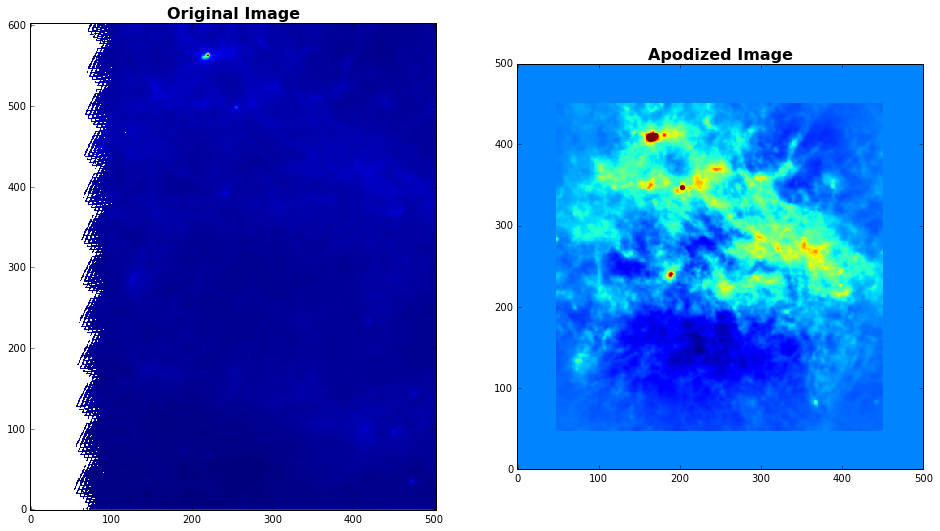

In [80]:
##-----open and apodize image------##

hdu=fits.open('HIGAL_PSW0584p10E_250_RM.fits')
image=hdu[0].data
image=image[200:,100:]
image=image-np.nanmedian(image)
nans=np.isnan(image)
image[nans]=0
apo=np.zeros((500,500))
taper=apo.copy()
h=np.hamming(410)
h2d=np.sqrt(np.outer(h,h))
taper[45:455,45:455]=h2d    
apo[48:451,48:451]=image
image=apo*taper
image[np.where(image>300)]=300

original, oax = plt.subplots(1,2,figsize=(16, 16))
oax[0].imshow(hdu[0].data, origin='lower', interpolation='None')
oax[0].set_title('Original Image', fontsize=16, fontweight='bold')
oax[1].imshow(image, origin='lower', interpolation='None')
oax[1].set_title('Apodized Image', fontsize=16, fontweight='bold')

## Deconstruction

The image was deconstructed into its Gaussian and Non-Gaussian wavelets using the same method as in J-F's paper or Nguyen van Yen 2012 paper.

In [81]:
 #deconstruction#
wt,wn,wc,tab_k,s1ac,s1a=fan_transform(image)
wc=np.sum(wc, axis=3)
rec_c=wts.halo_inverse(wc,tab_k)
rec_n=wts.halo_inverse(wn,tab_k)
x_c=wc.real
y_c=wc.imag
x_n=wn.real
y_n=wn.imag
print 'deconstructed'

deconstructed


## Choosing Scales to Look at

Initially I had this as a prompt, but this way it is hardwired, but easily changeable because it is just one cell.

Scales 10-18 are looked at because they seem the most interesting. There are 20 scales total in the deconstructed image, so these represent mid to high range.

In [82]:
start=10
stop=18
total=stop-start+1
col=int(np.sqrt(total))
row=int(total/col)
index=np.arange(total).reshape(col,row)
#print index

## Plotting

The rest of the code is finally the plotting of the images. The aspect ratio is kept at one, which was initially a problem for comparison. 

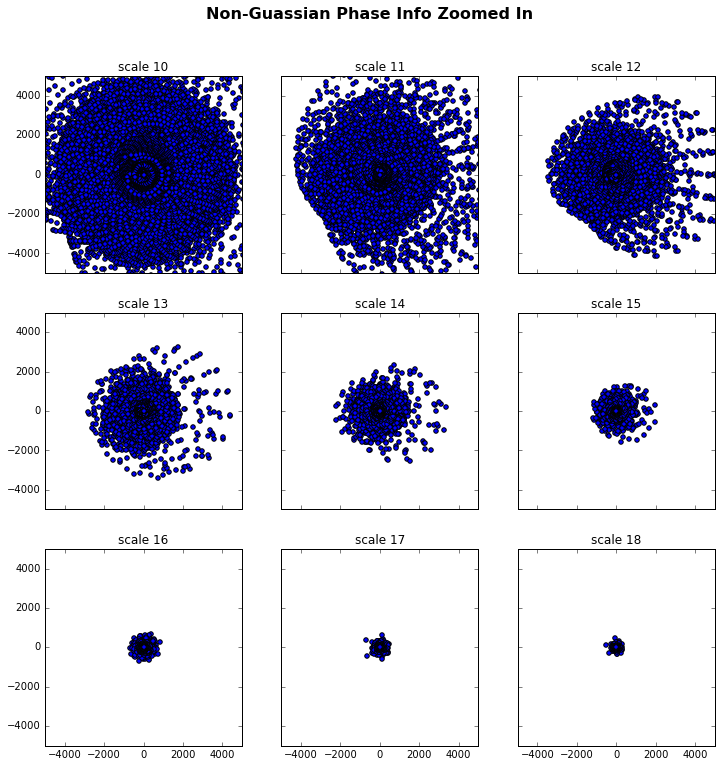

In [87]:
##plotting nongaussian phase info#
#fig = plt.figure(1, figsize=(14,14))
ng_fig, ng_axarr = plt.subplots(col, row, figsize=(12,12), sharex='col', sharey='row')
xlim = 5000.
ylim = xlim
for i in range(col):
    for j in range(row):
        ng_axarr[i,j].scatter( x_c [ :,:,index[i,j]+ start ],y_c[:,:,index[i,j]+start])
        ng_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        ng_axarr[i,j].set_xlim(-xlim,xlim)
        ng_axarr[i,j].set_ylim(-ylim,ylim)
ng_fig.suptitle('Non-Guassian Phase Info Zoomed In', fontsize=16, fontweight='bold')

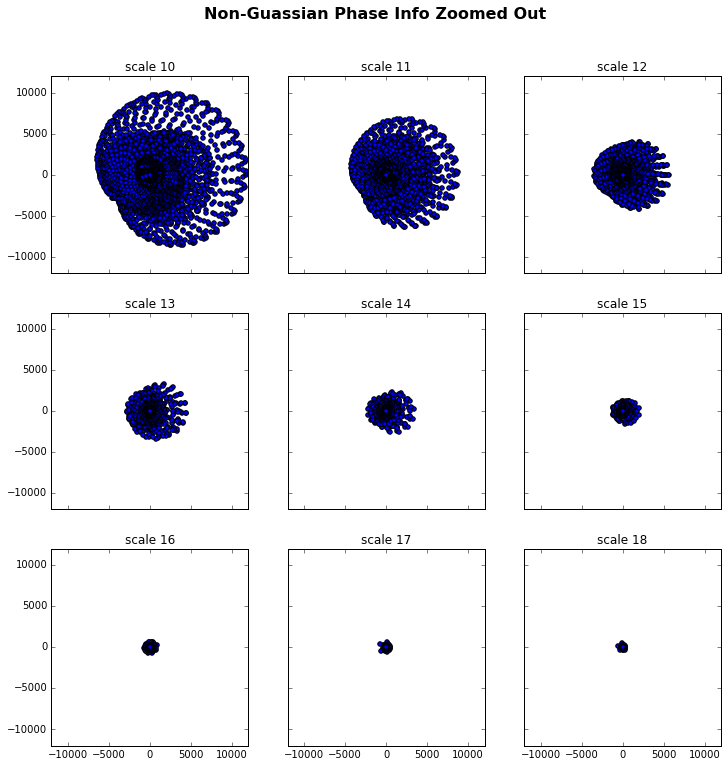

In [88]:
##plotting nongaussian phase info zoomed out#

zng_fig, zng_axarr = plt.subplots(col, row, figsize=(12,12), sharex='col', sharey='row')
xlim = 12000.
ylim = xlim
for i in range(col):
    for j in range(row):
        zng_axarr[i,j].scatter( x_c [ :,:,index[i,j]+ start ],y_c[:,:,index[i,j]+start])
        zng_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        zng_axarr[i,j].set_xlim(-xlim,xlim)
        zng_axarr[i,j].set_ylim(-ylim,ylim)
zng_fig.suptitle('Non-Guassian Phase Info Zoomed Out', fontsize=16, fontweight='bold')

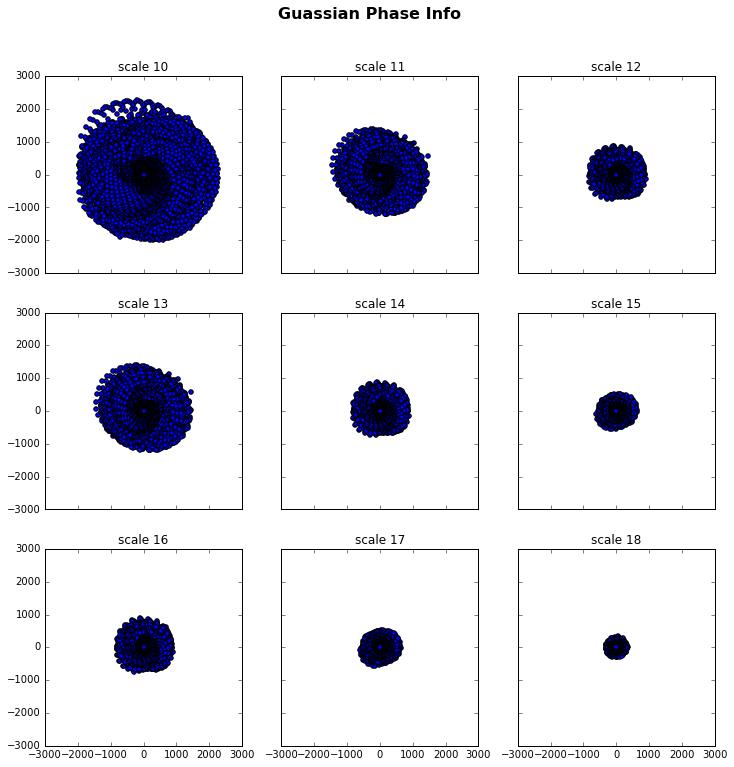

In [89]:
##plotting gaussian phase info#
#plt.figure(2)
g_fig, g_axarr= plt.subplots(col, row, sharex='col', sharey='row', figsize=(12,12))
xlim = 3000.
ylim = xlim
for i in range(col):
    for j in range(row):
        g_axarr[i,j].scatter(x_n[:,:,i+j+10],y_n[:,:,i+j+10])
        g_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        g_axarr[i,j].set_xlim(-xlim,xlim)
        g_axarr[i,j].set_ylim(-ylim,ylim)
g_fig.suptitle('Guassian Phase Info', fontsize=16, fontweight='bold')

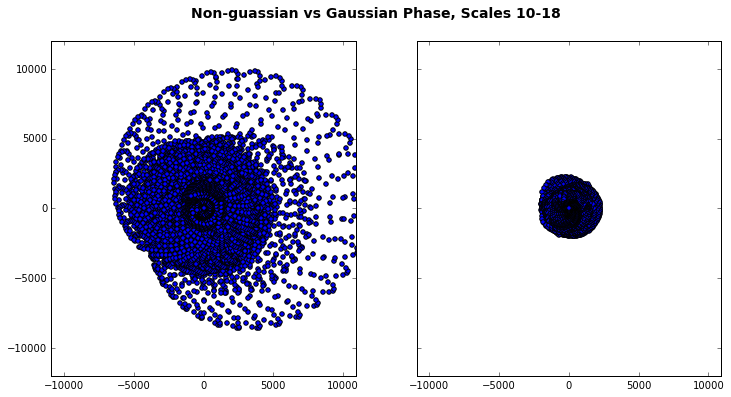

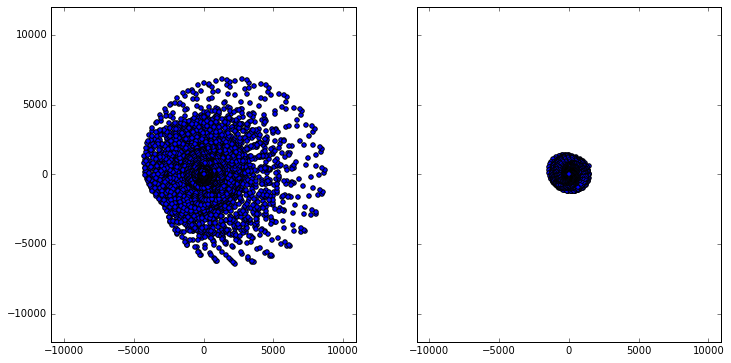

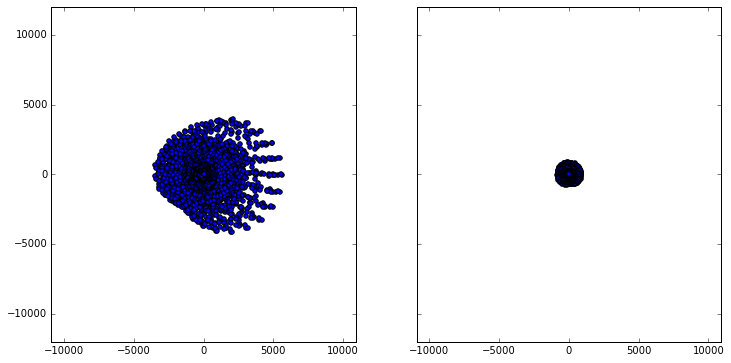

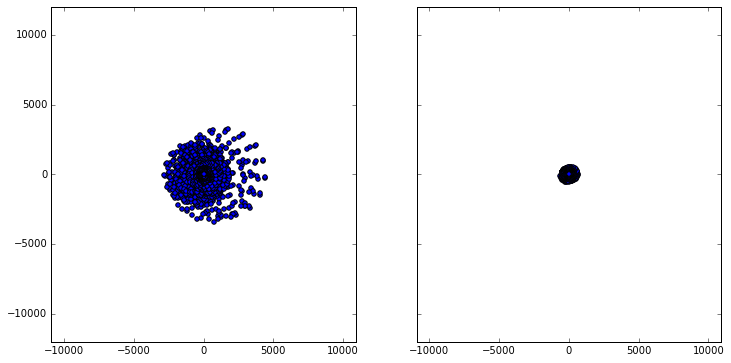

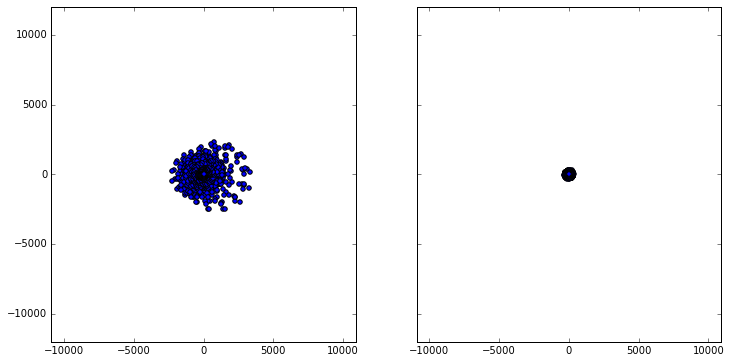

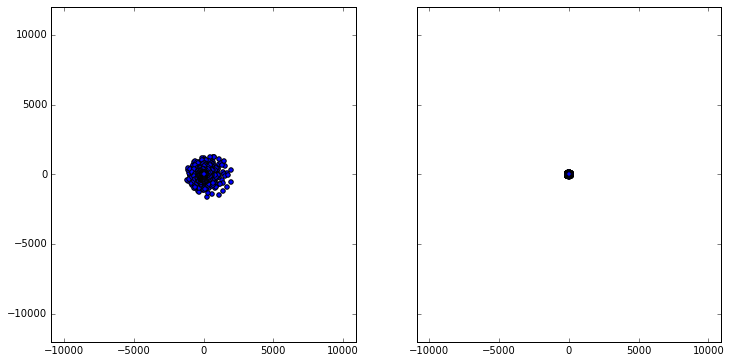

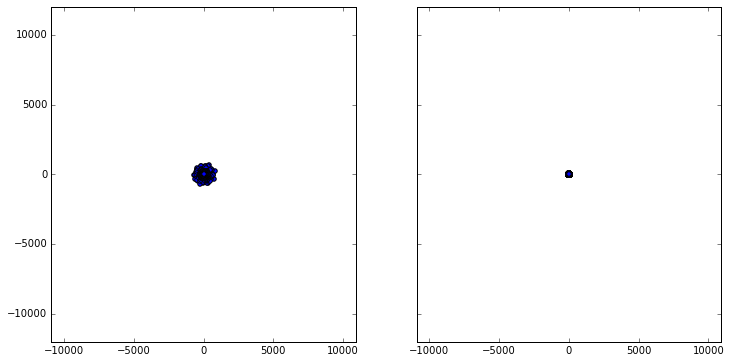

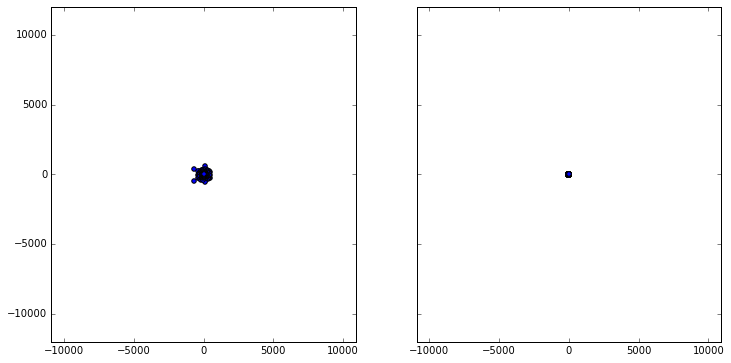

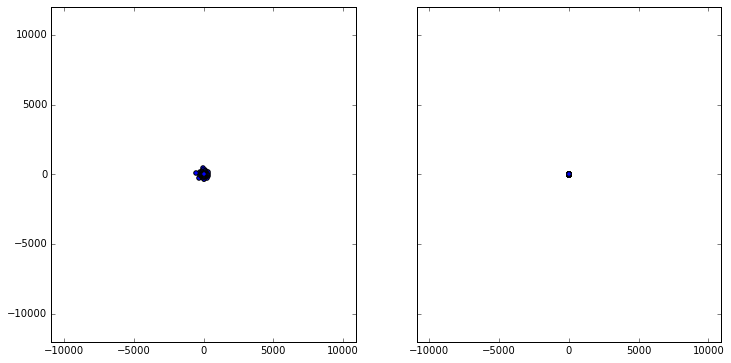

In [90]:
##on same plot#
fig=list()
axarr=list()
xmax = 12000.
ymax = xmax
for i in range (total):
    fig_i, axarr_i= plt.subplots (1,2, sharex='all', sharey='all', figsize=(12,6))
    axarr_i[0].scatter(x_c[:,:,i+start], y_c[:,:,i+start])
    axarr_i[1].scatter(x_n[:,:,i+start], y_n[:,:,i+start])
    axarr_i[0].set(xlim=[-xmax, xmax], ylim=[-ymax, ymax], aspect=1)# adjustable='box-forced')
    axarr_i[1].set(xlim=[-xmax, xmax], ylim=[-ymax, ymax], aspect=1)
    #plt.axes().set_aspect('equal', 'datalim')
    fig.append(fig_i)
    axarr.extend(axarr_i)
fig[0].suptitle('Non-guassian vs Gaussian Phase, Scales 10-18', fontsize=14, fontweight='bold')
 

## Thoughts

So hopefully this is more of the way ipython notebook is intended to be used. I didn't have to use latex, but I messed around some with the markdown formatting.

So there might be something here, but I am not yet sure how this will work going back to the image. The pattern reminds me of something like what you see making t-shirts on the t-shirt paint and spin things, or using a compass to draw a spriral pattern. So the point is if it is common there might be some math about it to learn. I'll let you know.